In [ ]:
import pandas as pd

final_corrected_file_path = '/content/final_adjusted_addresses_corrected_proportions.csv'
model_data = pd.read_csv(final_corrected_file_path)

model_data[['Latitude', 'Longitude']] = model_data['Delivery Address (Lat, Long)'].str.split(',', expand=True).apply(pd.to_numeric)


model_features = model_data[['Customer ID', 'Latitude', 'Longitude', 'Address Type', 'Initial Time Slot', 'Delivery Outcome']]

model_features.info(), model_features.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        5000 non-null   object 
 1   Latitude           5000 non-null   float64
 2   Longitude          5000 non-null   float64
 3   Address Type       5000 non-null   int64  
 4   Initial Time Slot  5000 non-null   int64  
 5   Delivery Outcome   5000 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 234.5+ KB


(None,
           Latitude    Longitude  Address Type  Initial Time Slot  \
 count  5000.000000  5000.000000   5000.000000        5000.000000   
 mean     17.431136    78.469449      1.625800           1.976600   
 std       0.047281     0.044088      0.769346           1.336716   
 min      17.347297    78.393548      1.000000           1.000000   
 25%      17.391191    78.429840      1.000000           1.000000   
 50%      17.429529    78.467547      1.000000           1.000000   
 75%      17.470807    78.509088      2.000000           3.000000   
 max      17.515983    78.553874      3.000000           5.000000   
 
        Delivery Outcome  
 count       5000.000000  
 mean           0.858800  
 std            0.348263  
 min            0.000000  
 25%            1.000000  
 50%            1.000000  
 75%            1.000000  
 max            1.000000  )

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
model_features['Customer ID'] = le.fit_transform(model_features['Customer ID'])

X = model_features[['Customer ID', 'Latitude', 'Longitude', 'Address Type']]
y = model_features['Initial Time Slot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_classifier = DecisionTreeClassifier(random_state=42)

tree_classifier.fit(X_train, y_train)

y_pred = tree_classifier.predict(X_test)

accuracy = tree_classifier.score(X_test, y_test)
accuracy


<ipython-input-3-4d1172912c05>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_features['Customer ID'] = le.fit_transform(model_features['Customer ID'])


0.927

In [ ]:
import numpy as np
customer_ids = ['CUST102', 'CUST151', 'CUST104','CUST040']
new_data = np.array([
    [17.490, 78.504, 1],  # Latitude, Longitude, Address Type
    [17.470, 78.448, 1],
    [17.484, 78.478, 3],
    [17.467998, 78.413967,3]
])

# Encoding Customer ID in the new data (transform them separately)
encoded_customer_ids = le.transform(customer_ids)  # Use the LabelEncoder 'le' used during training

# Prepare the complete input array for the model
full_new_data = np.column_stack((encoded_customer_ids, new_data))

# Convert the data to float as required by the model
full_new_data = full_new_data.astype(float)

# Predict the time slots using the trained model
predicted_time_slots = tree_classifier.predict(full_new_data)

# Display the results mapping back to the original customer IDs
for i, time_slot in enumerate(predicted_time_slots):
    print(f"Predicted Time Slot for {customer_ids[i]} (Address Type {int(new_data[i, 2])}): Time Slot {time_slot}")



Predicted Time Slot for CUST102 (Address Type 1): Time Slot 1
Predicted Time Slot for CUST151 (Address Type 1): Time Slot 5
Predicted Time Slot for CUST104 (Address Type 3): Time Slot 3
Predicted Time Slot for CUST040 (Address Type 3): Time Slot 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


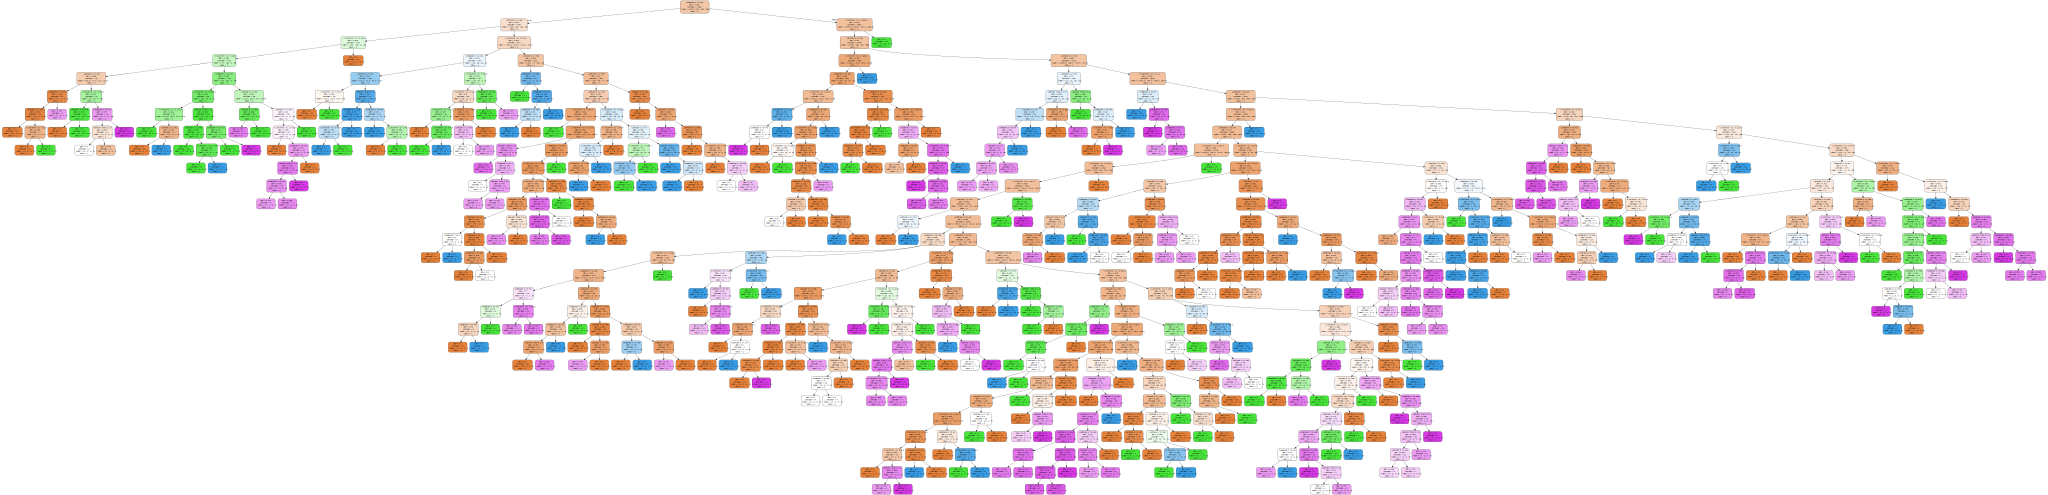

'decision_tree.png'

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

# Export the decision tree to a dot format
dot_data = export_graphviz(
    tree_classifier,
    out_file=None,
    feature_names=['Customer ID', 'Latitude', 'Longitude', 'Address Type'],
    class_names=[str(i) for i in tree_classifier.classes_],  # Convert class labels to string for display
    filled=True,
    rounded=True,
    special_characters=True
)

# Generate the graph using graphviz
graph = graphviz.Source(dot_data)
display(graph)

# Optionally, save the graph to a file
graph.render("decision_tree", format='png', cleanup=True)


In [ ]:
import joblib

# Assuming 'tree_classifier' is your trained model
joblib.dump(tree_classifier, 'model.pkl')


['model.pkl']